**Data Cleaning and Preprocessing (Days 1-2):**

**1. Load the raw dataset (e.g., CSV format) into a data analysis environment (Python with
Pandas).**

In [310]:
import pandas as pd
import seaborn as sns


In [311]:
# Load th data
customer_info = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer_info.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


**2. Examine the data for missing values, duplicates, and outliers.**

In [312]:
# after somes reseache, I discouvered `TotalCharges` contains empty strings which makes it not possible to easily know
#when applying isna() and isnull(), So we will replace all empty strings to NA
customer_info = customer_info.replace(r'^\s*$', pd.NA, regex=True)

#checks for na values, this will check for na(Undifined) values and count
nas = customer_info.isna().sum()

#checks for duplicates, this will check and count duplicates if any
duplicates = customer_info.duplicated().sum()

print("Numeber of Na(Undefine) is \n{} \n \n so the only missing values is in `TotalCharges` and there are 11".format(nas))
print("\n\nThere are {} duplicate values".format(duplicates))

Numeber of Na(Undefine) is 
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64 
 
 so the only missing values is in `TotalCharges` and there are 11


There are 0 duplicate values


In [313]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [314]:
#Lets check the consistency of the data
print("gender : {}".format(customer_info['gender'].unique()))
print("SeniorCitizen : {}".format(customer_info['SeniorCitizen'].unique()))
print("Partner : {}".format(customer_info['Partner'].unique()))
print("Churn : {}".format(customer_info['Churn'].unique()))
print("Dependents : {}".format(customer_info['Dependents'].unique()))
print("PhoneService : {}".format(customer_info['PhoneService'].unique()))
print("MultipleLines : {}".format(customer_info['MultipleLines'].unique()))
print("InternetService : {}".format(customer_info['InternetService'].unique()))
print("OnlineSecurity : {}".format(customer_info['OnlineSecurity'].unique()))
print("DeviceProtection : {}".format(customer_info['DeviceProtection'].unique()))
print("OnlineBackup : {}".format(customer_info['OnlineBackup'].unique()))
print("TechSupport : {}".format(customer_info['TechSupport'].unique()))
print("StreamingTV : {}".format(customer_info['StreamingTV'].unique()))
print("StreamingMovies : {}".format(customer_info['StreamingMovies'].unique()))
print("Contract : {}".format(customer_info['Contract'].unique()))
print("InternetService : {}".format(customer_info['InternetService'].unique()))
print("PaperlessBilling : {}".format(customer_info['PaperlessBilling'].unique()))
print("PaymentMethod : {}".format(customer_info['PaymentMethod'].unique()))
# print(customer_info['tenure'].unique())
# print(customer_info['MonthlyCharges'].unique())
# print(customer_info['TotalCharges'].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Churn : ['No' 'Yes']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
InternetService : ['DSL' 'Fiber optic' 'No']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Lets check for outliers on the numerical variables `Tenure`, `MonthlyCharges` , `TotalCharges`

<Axes: xlabel='tenure'>

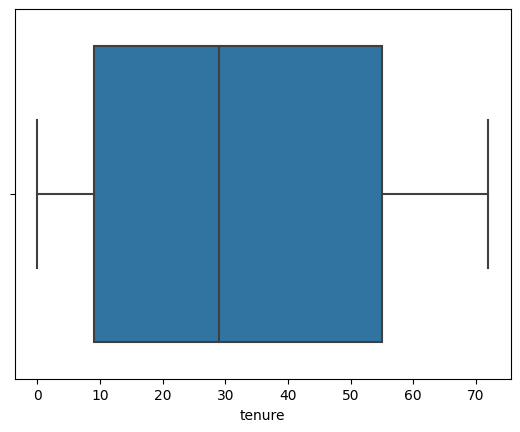

In [315]:
#now lets check for outliers on Tenure, Here we will use the box chart and seaborn
sns.boxplot(x=customer_info['tenure'],showfliers=True)

In [316]:
# calculate IQR
Q1 = customer_info['tenure'].quantile(0.25)
Q3 = customer_info['tenure'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
outliers = customer_info[(customer_info['tenure'] < (Q1 - 1.5 * IQR)) | (customer_info['tenure'] > (Q3 + 1.5 * IQR))]

# print outliers
print(outliers)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [317]:
# remove outliers
df = customer_info[(customer_info['tenure'] >= (Q1 - 1.5 * IQR)) & (customer_info['tenure'] <= (Q3 + 1.5 * IQR))]

# print filtered dataframe
assert (df.size == customer_info.size)

<Axes: xlabel='MonthlyCharges'>

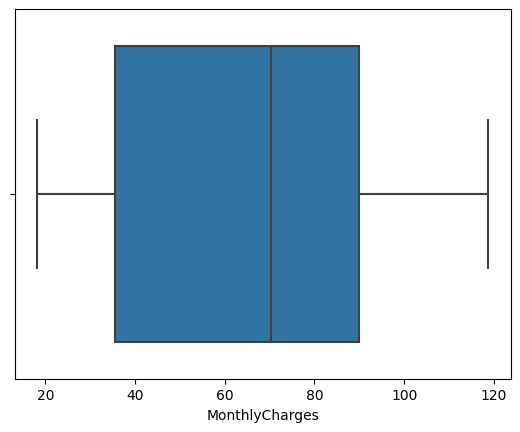

In [318]:
#now lets check for outliers on MonthlyCharges, Here we will use the box chart and seaborn
sns.boxplot(x=customer_info['MonthlyCharges'],showfliers=True)

<ipython-input-319-ba1f3f255291>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_inf['TotalCharges'] = customer_inf['TotalCharges'].astype('float64')


<Axes: xlabel='TotalCharges'>

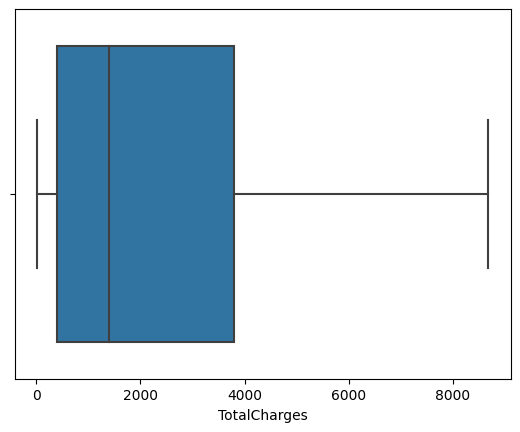

In [319]:
customer_inf = customer_info.dropna()
customer_inf['TotalCharges'] = customer_inf['TotalCharges'].astype('float64')
sns.boxplot(x=customer_inf['TotalCharges'],showfliers=True)

In [320]:
#now lets check for outliers on TotalCharges, Here we will use the box chart and seaborn

totalCharges = customer_inf['TotalCharges']

# calculate IQR
Q1 = totalCharges.quantile(0.25)
Q3 = totalCharges.quantile(0.75)
IQR = Q3 - Q1

# identify outliers
outliers = customer_inf[(customer_inf['TotalCharges'] < (Q1 - 1.5 * IQR)) | (customer_inf['TotalCharges'] > (Q3 + 1.5 * IQR))]

# print outliers
print(outliers)


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


The format of `TotalCharges` seams problematic, so after researches we discovered there are empty string. so we will have to replace all empty string wi `None` values

**3. Handle missing data through techniques like imputation (e.g., mean, median) or removal of
rows/columns.**

There are missing values, the only column with missing values is `TotalCharge` and it also have format problems. So we will removes row corresponding to these missing values. This is because there is only 11 of them and we don't know how it should be calculated

In [321]:
# drop None values
customer_info = customer_info.dropna()

**4. Address duplicates, if any, and remove unnecessary columns.**

`customerID`: This variable is a unique identifier and is unlikely to be useful in predicting customer churn. Therefore, it may be of no use for your analysis.


`gender`: This variable may or may not be a useful predictor of customer churn. It's possible that gender could be a factor in whether or not customers churn, but it's generally considered to be less influential than other variables such as customer behavior or service satisfaction.
The Histograme bellow shows that gender deos not affect the churn

it is like `PaymentMethod` is related even if it is only small , with churn

In [322]:
# customer_info['tenure'].corr(customer_info['TotalCharges'])

as For the rest of variables, we will keep them for further analysis. Bellow are reasons

`SeniorCitizen`: This variable may be a useful predictor of customer churn in our context. Senior citizens may have different usage patterns and needs than younger customers, which could affect their likelihood of churning.

`Partner` and `Dependents`: These variables may be useful predictors of customer churn. For example, customers who have dependents may be more likely to stay with a telecom company if they have family plans or are part of a bundled offer.

`tenure`: This variable is likely to be one of the most important predictors of customer churn, as it represents the length of time a customer has been using the company's services.

`PhoneService` and `MultipleLines`: These variables may be important predictors of churn, as customers may switch providers if they are dissatisfied with the quality or availability of phone services.

`InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies`: These variables are likely to be strong predictors of customer churn since internet services and related features are typically the primary offerings of these companies.

`Contract`: This variable is very likely to be an important predictor of customer churn in the telecom industry, as customers may be more likely to churn if they are on short-term contracts or pay-as-you-go plans rather than long-term contracts.

`PaperlessBilling`: This variable may be a useful predictor of customer churn due to the fact that customers who prefer paperless billing may be more likely to switch providers if they are dissatisfied with the quality of service.

`PaymentMethod`: This variable may be a useful predictor of customer churn as customers on certain payment plans (e.g., pre-paid versus auto-pay) may be more likely to churn.

`MonthlyCharges`: This variable is likely to be an important predictor of customer churn since customers may become dissatisfied with the value they are getting from the service if their monthly charges are too high or if the company's pricing model changes.

`TotalCharges`: This variable may be an important predictor of customer churn in our context if it is used in conjunction with tenure (but its mixt format does not permit us to check) because Long-term customers with high total charges may be less likely to churn than short-term customers with low total charges.

`Churn`: This is your target variable, and it is the most important variable for your customer churn analysis in the context of a telecom company.

In [323]:
#lets remove un useful variables
customer_infos = customer_info.drop(['customerID'], axis=1)

**5. Encode categorical variables (e.g., one-hot encoding) for modeling purposes.**

In [1]:
%pip install category_encoders

In [325]:
customer_infos.select_dtypes(include=['object']).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [326]:
{col: dict(zip(customer_infos[col].unique(), [col + '_' + str(i) for i in customer_infos[col].unique()])) for col in customer_cols if customer_infos[col].nunique() == 2}

{'gender': {'Female': 'gender_Female', 'Male': 'gender_Male'},
 'SeniorCitizen': {0: 'SeniorCitizen_0', 1: 'SeniorCitizen_1'},
 'Partner': {'Yes': 'Partner_Yes', 'No': 'Partner_No'},
 'Dependents': {'No': 'Dependents_No', 'Yes': 'Dependents_Yes'},
 'PhoneService': {'No': 'PhoneService_No', 'Yes': 'PhoneService_Yes'},
 'PaperlessBilling': {'Yes': 'PaperlessBilling_Yes',
  'No': 'PaperlessBilling_No'},
 'Churn': {'No': 'Churn_No', 'Yes': 'Churn_Yes'}}

In [327]:
import category_encoders as ce

# find all categorical columns in the dataframe
cat_cols = customer_infos.select_dtypes(include=['object']).columns


# perform encoding on each categorical column based on number of categories
customer_cols = customer_infos.columns
mapping_dict = {col: dict(zip(customer_infos[col].unique(), [col + '_' + str(i) for i in customer_infos[col].unique()])) for col in customer_cols if customer_infos[col].nunique() == 2}
#  {col: dict(zip(df[col].unique(), [col + '_' + str(i) for i in range(1, df[col].nunique()+1)])) for col in customer_cols}
# for col in cat_cols:
for col in customer_cols:
    unique_vals = customer_infos[col].nunique()
    if unique_vals == 2:
        # binary encoding for columns with two categories
        bin_enc = ce.BinaryEncoder(cols=[col],mapping=[{'col': col, 'mapping': mapping_dict[col]}])
        customer_infos = bin_enc.fit_transform(customer_infos)
    elif unique_vals == 3 or unique_vals == 4:
        # one-hot encoding for columns with three or four categories
        one_hot = pd.get_dummies(customer_infos[col], prefix=col, drop_first=False)
        customer_infos = pd.concat([customer_infos, one_hot], axis=1)
        customer_infos = customer_infos.drop(columns=[col])

customer_infos.head()


,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,1,0,0,1,34,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,1,0,0,1,2,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,1,1,0,0,1,45,0,...,1,0,0,0,1,0,1,0,0,0
4,0,1,0,1,1,0,0,1,2,1,...,1,0,0,1,0,0,0,0,1,0


**6. Normalize or scale numeric features if needed.**

In [328]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
customer_infos[['tenure', 'MonthlyCharges','TotalCharges']] = scaler.fit_transform(customer_infos[['tenure' , 'MonthlyCharges','TotalCharges']])
customer_infos[['tenure', 'MonthlyCharges','TotalCharges']].head(4)

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241


**Data Exploration (Days 3-4):**

> **7. Perform descriptive statistics to summarize the dataset (e.g., mean, median, standard
deviation).**



In [330]:
customer_infos.describe()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.495307,0.162400,0.837600,0.517491,0.482509,0.298493,0.701507,0.442560,0.903299,...,0.395478,0.216155,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.500014,0.368844,0.368844,0.499729,0.499729,0.457629,0.457629,0.345708,0.295571,...,0.488988,0.411650,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.394366,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.760563,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [331]:
customer_info.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000




> **8. Explore the distribution of key variables, such as customer demographics (age, gender), usage
patterns (monthly charges, total charges), and churn status.**




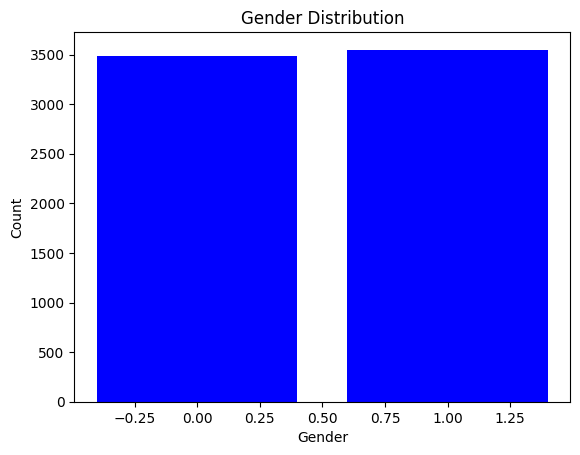

In [332]:
# plot a bar chart of gender
import matplotlib.pyplot as plt

gender_counts = customer_infos['gender_0'].value_counts()
plt.bar(x=gender_counts.index, height=gender_counts.values, color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

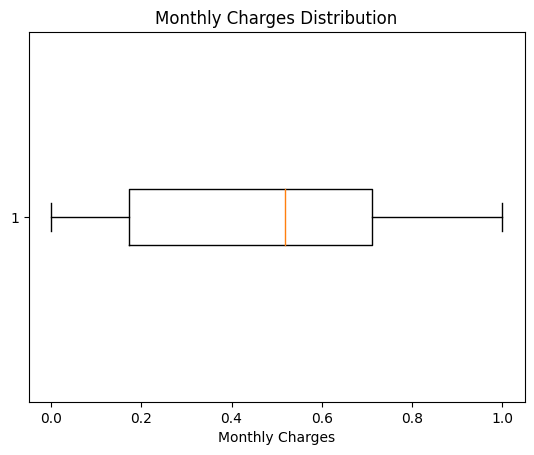

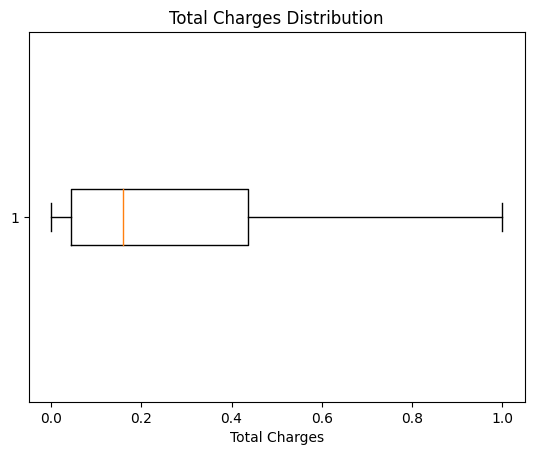

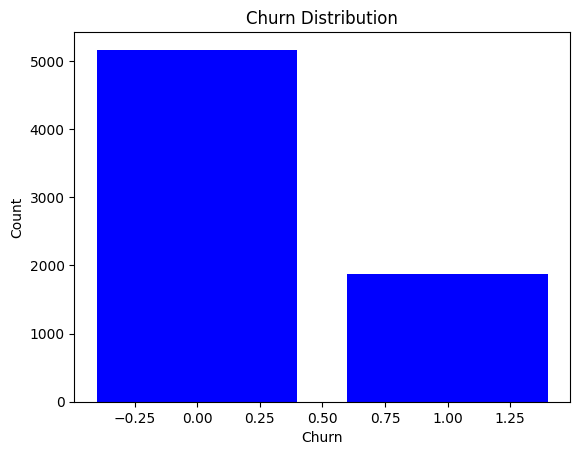

In [333]:
# plot a boxplot of monthly charges
plt.boxplot(customer_infos['MonthlyCharges'], vert=False)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.show()

# plot a boxplot of total charges
plt.boxplot(customer_infos['TotalCharges'], vert=False)
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.show()

# plot a bar chart of churn status
churn_counts = customer_infos['Churn_0'].value_counts()
plt.bar(x=churn_counts.index, height=churn_counts.values, color='blue')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

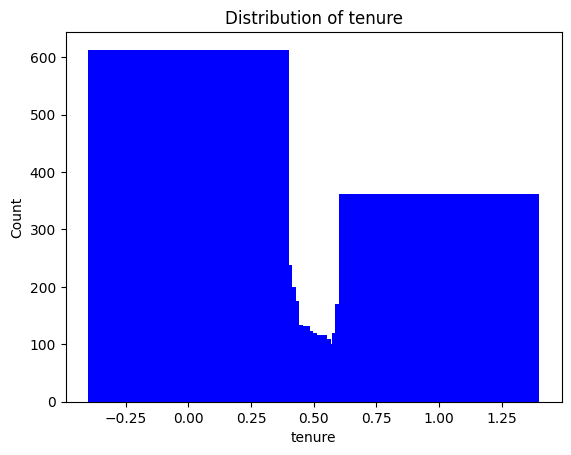

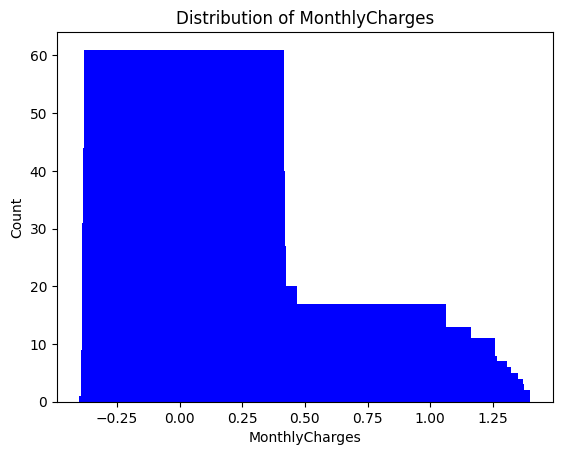

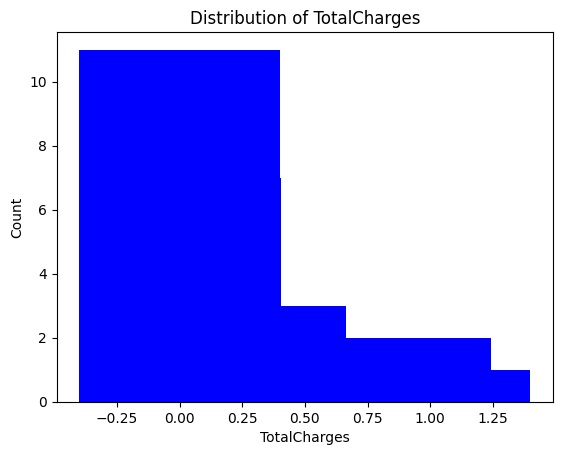

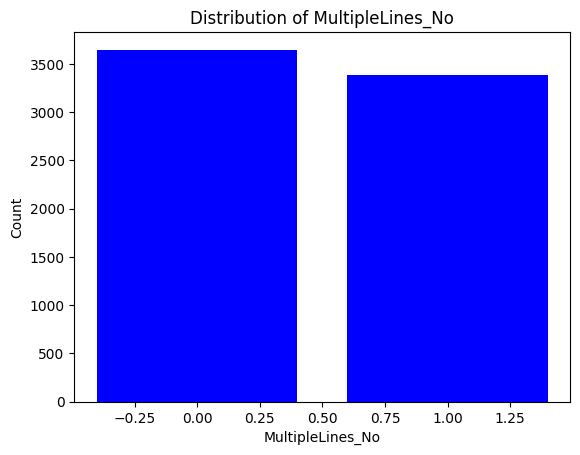

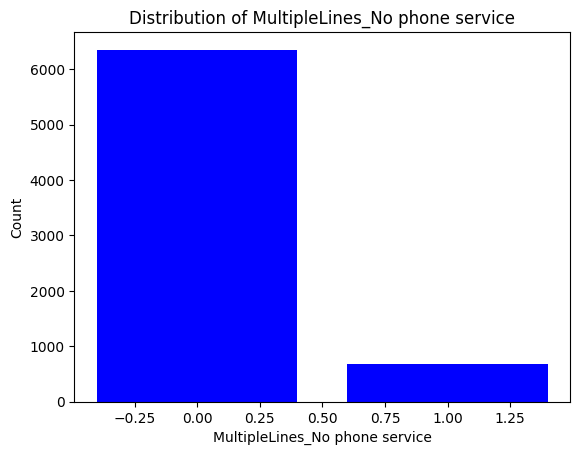

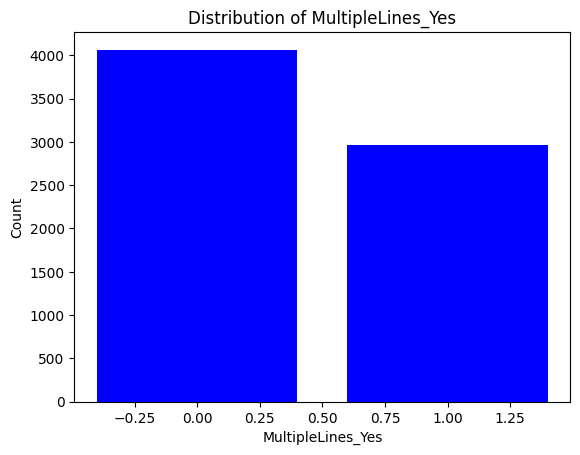

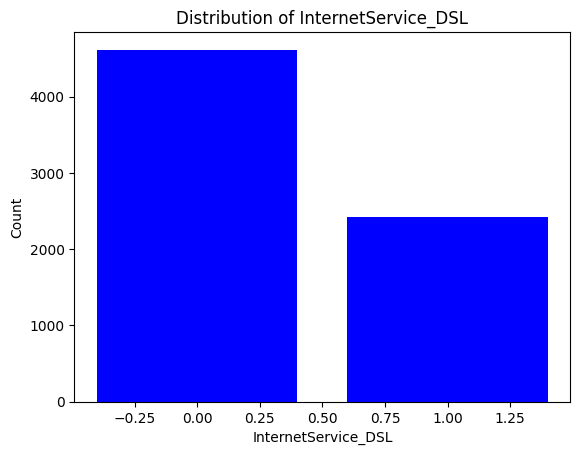

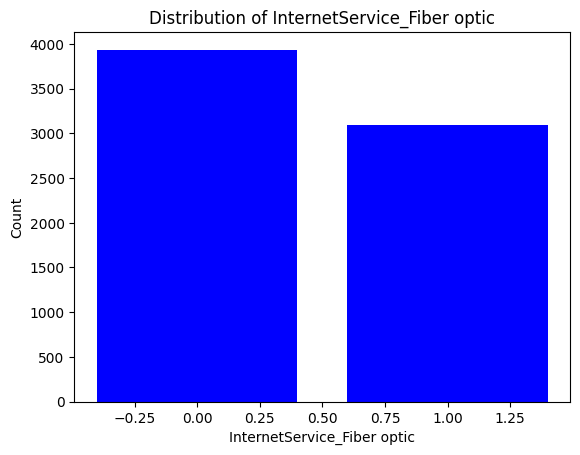

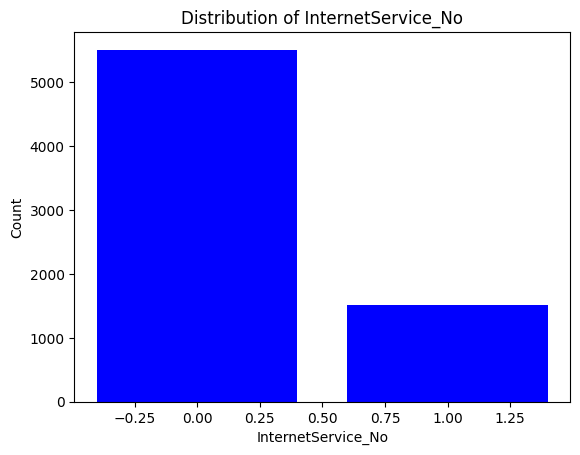

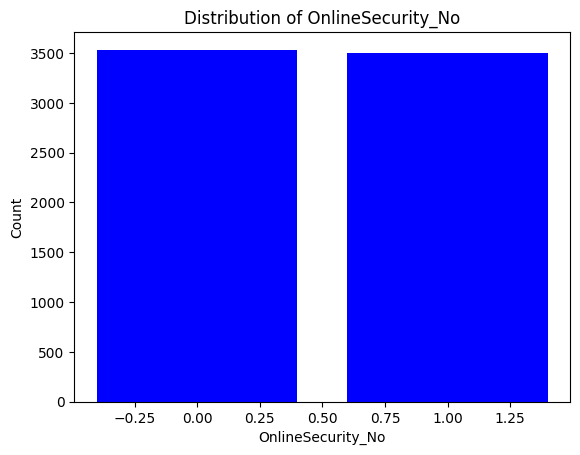

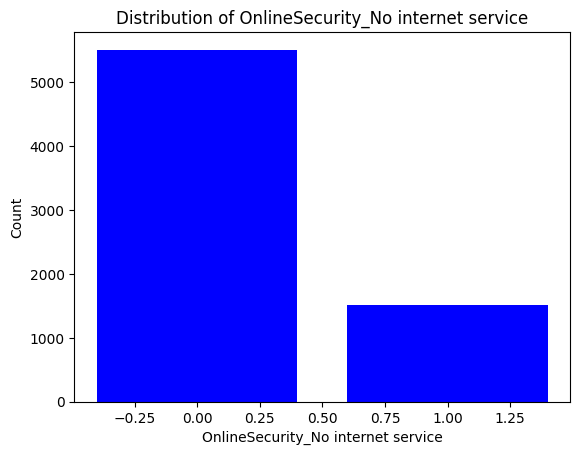

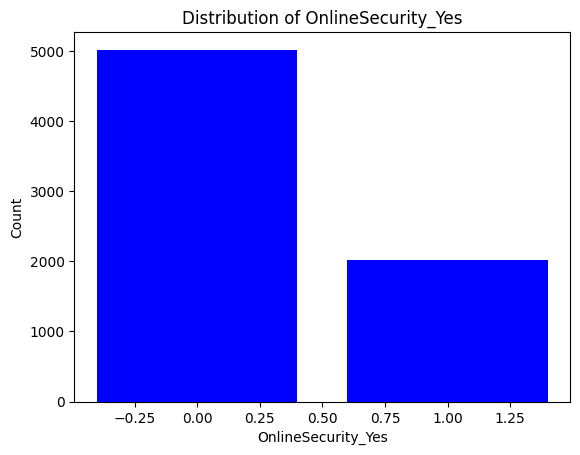

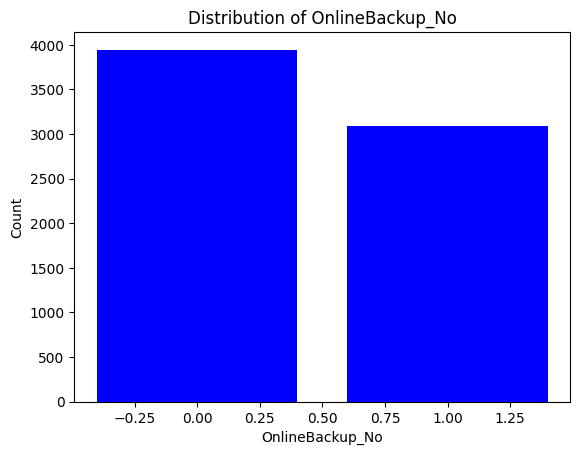

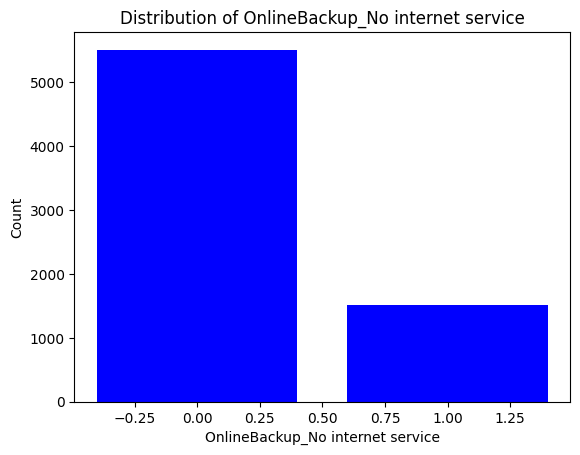

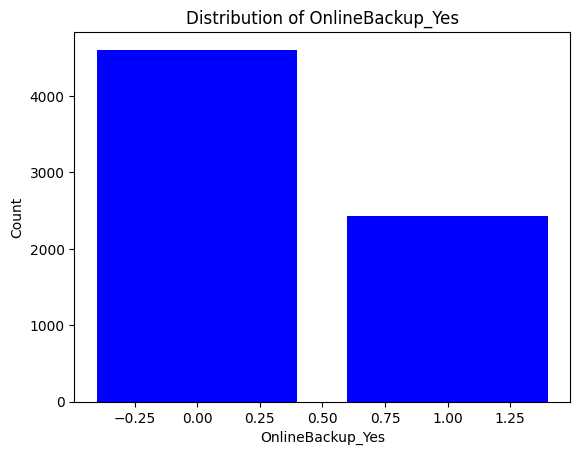

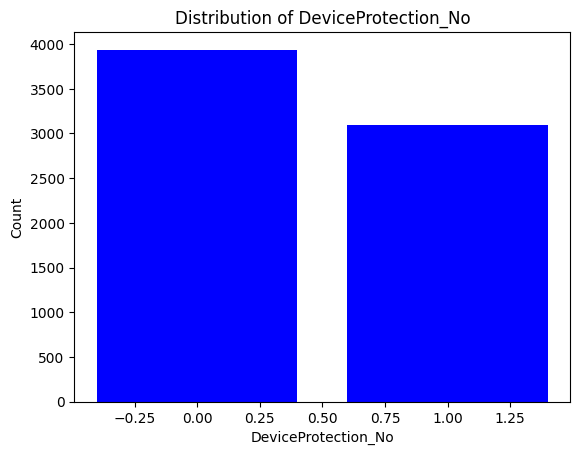

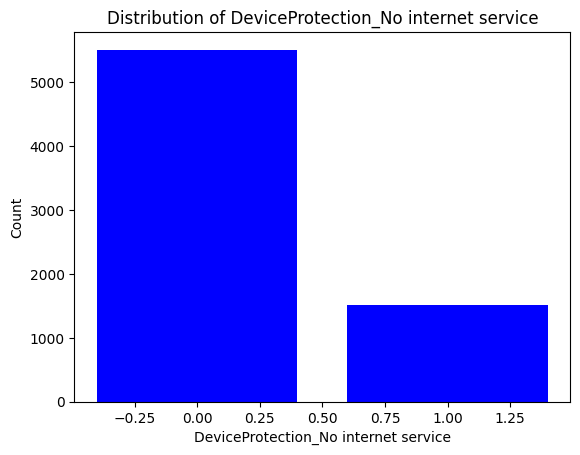

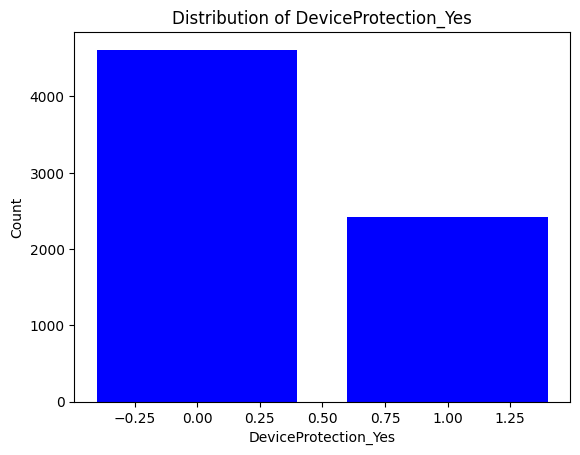

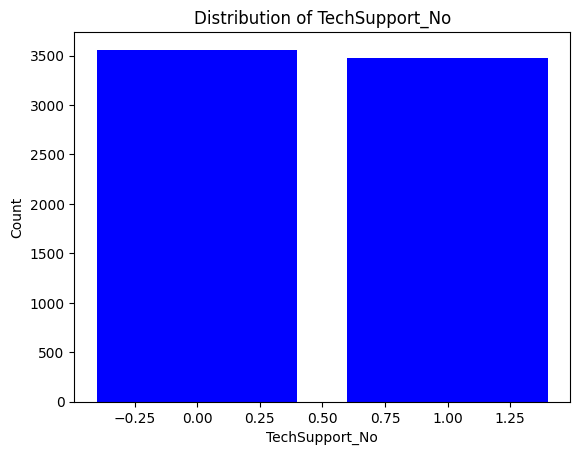

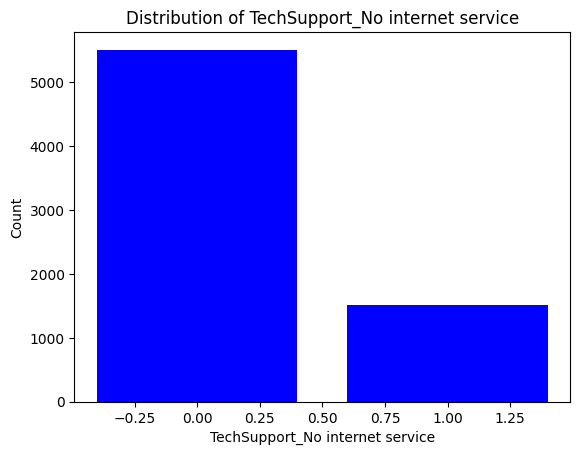

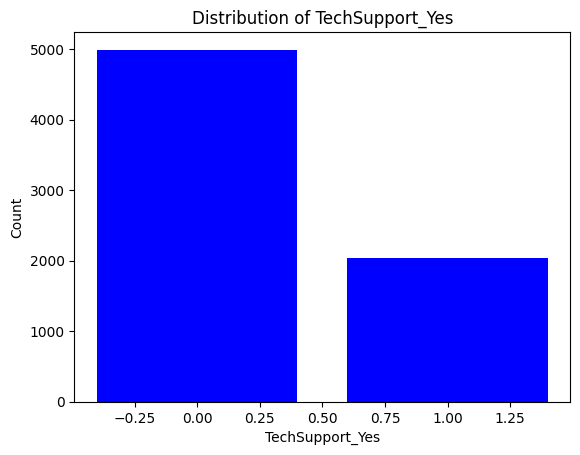

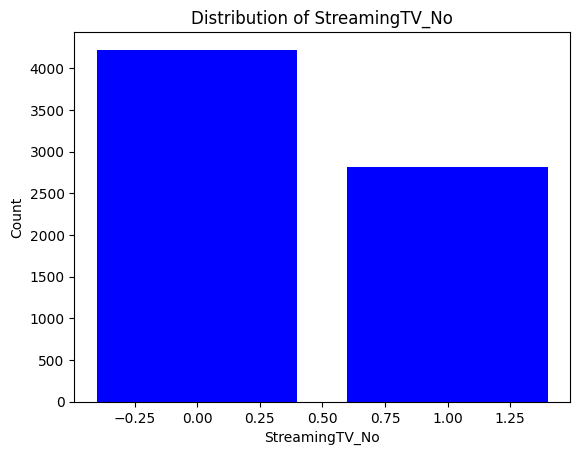

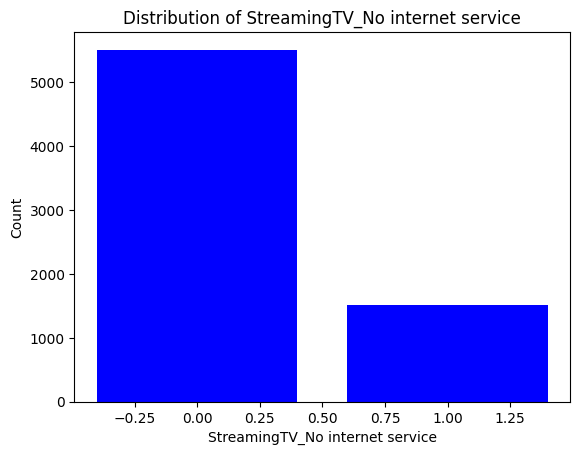

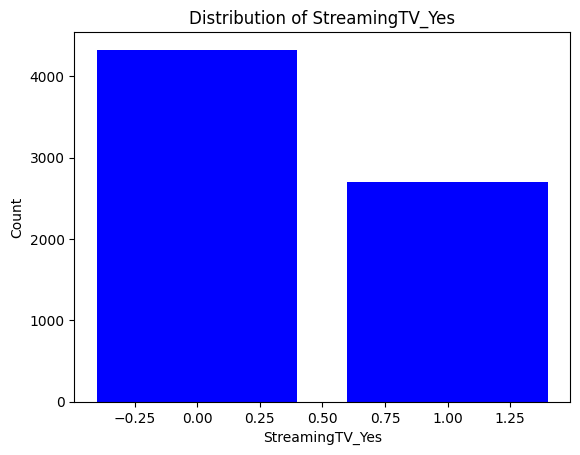

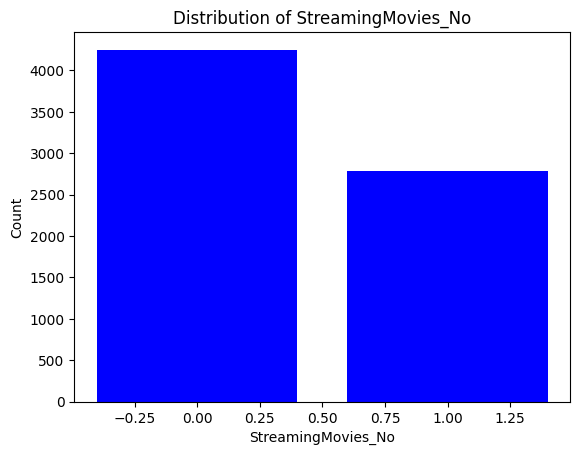

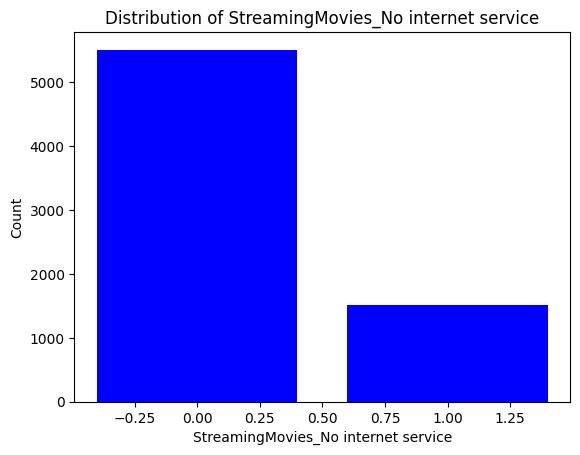

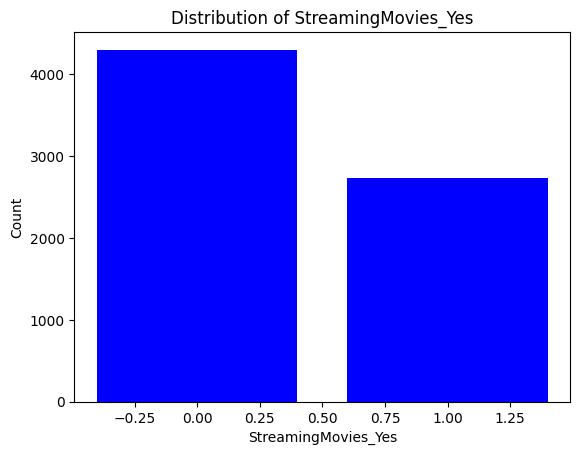

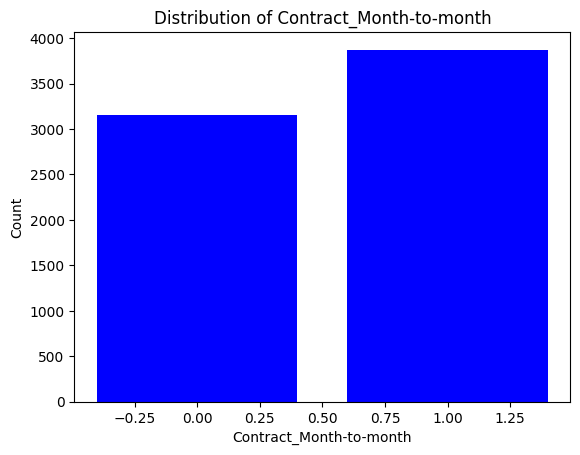

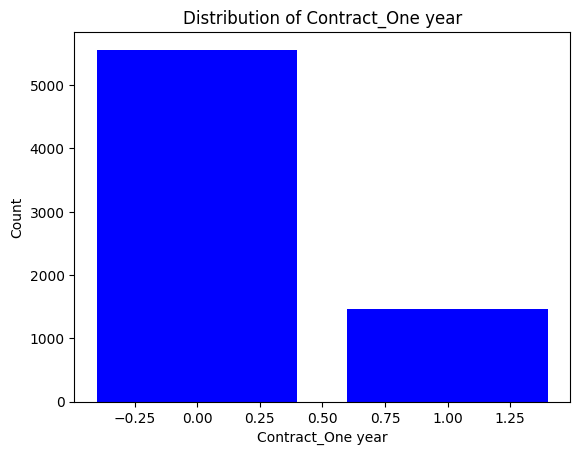

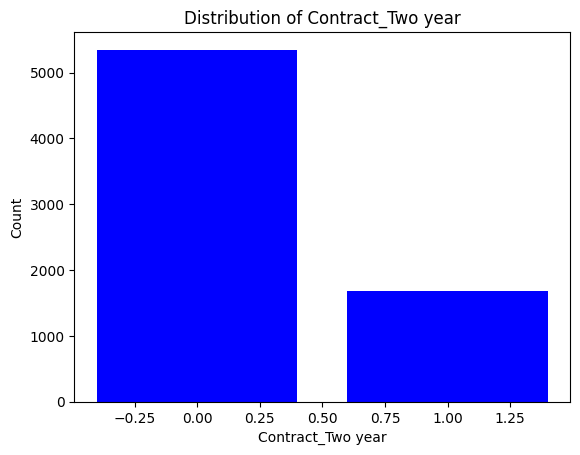

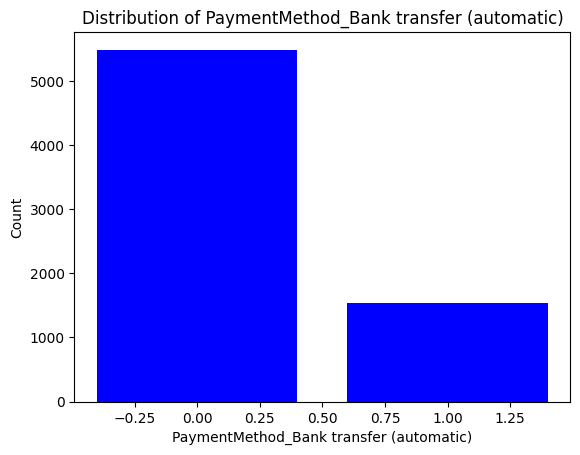

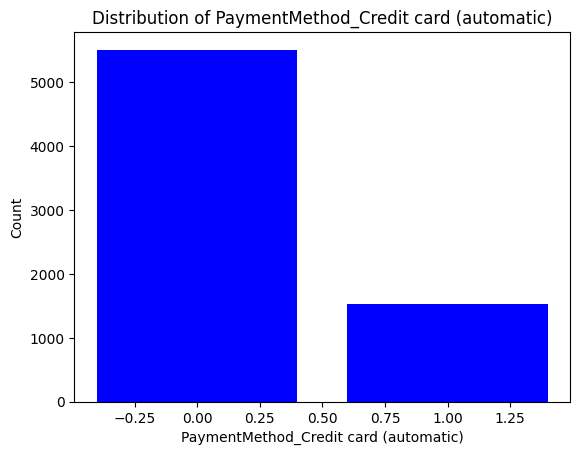

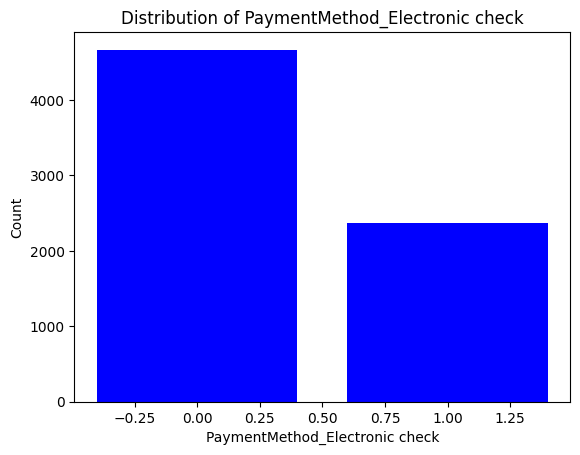

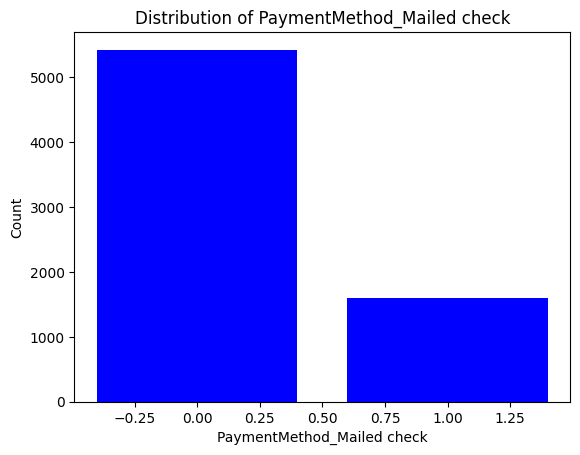

In [334]:
# plot bar charts of one-hot encoded variables
for col_name in customer_infos.filter(regex='^(?!.*_[01]).*').columns:
    val_counts = customer_infos[col_name].value_counts()
    plt.bar(x=val_counts.index, height=val_counts.values, color='blue')
    plt.title('Distribution of {}'.format(col_name))
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.show()



> **9. Calculate and visualize correlations between variables (e.g., using a heatmap).**



<ipython-input-335-e60cf0a93e5b>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = customer_info.corr()


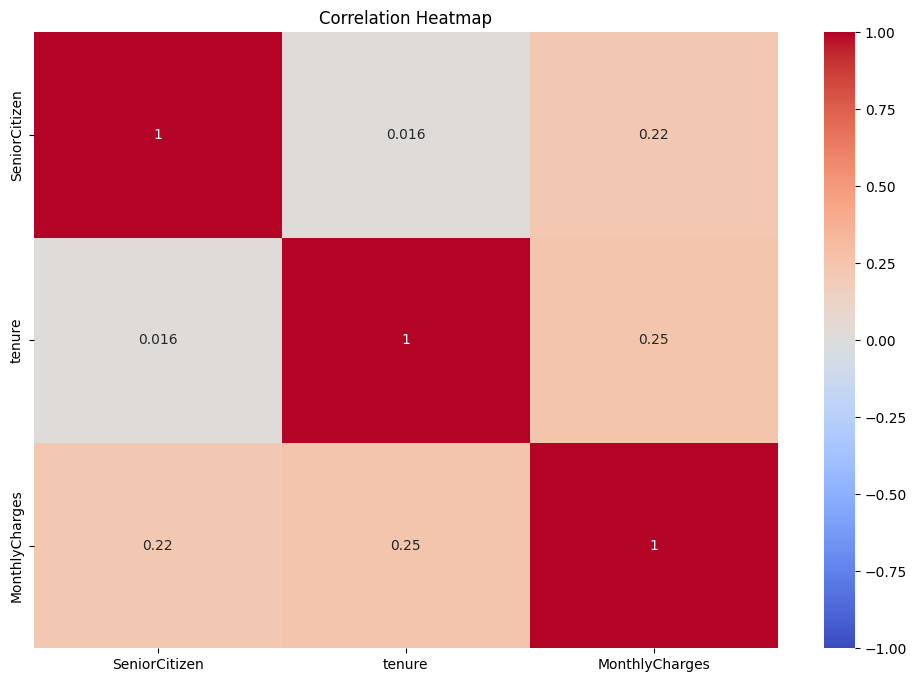

In [335]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# calculate the correlation matrix
corr_matrix = customer_info.corr()

# plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()


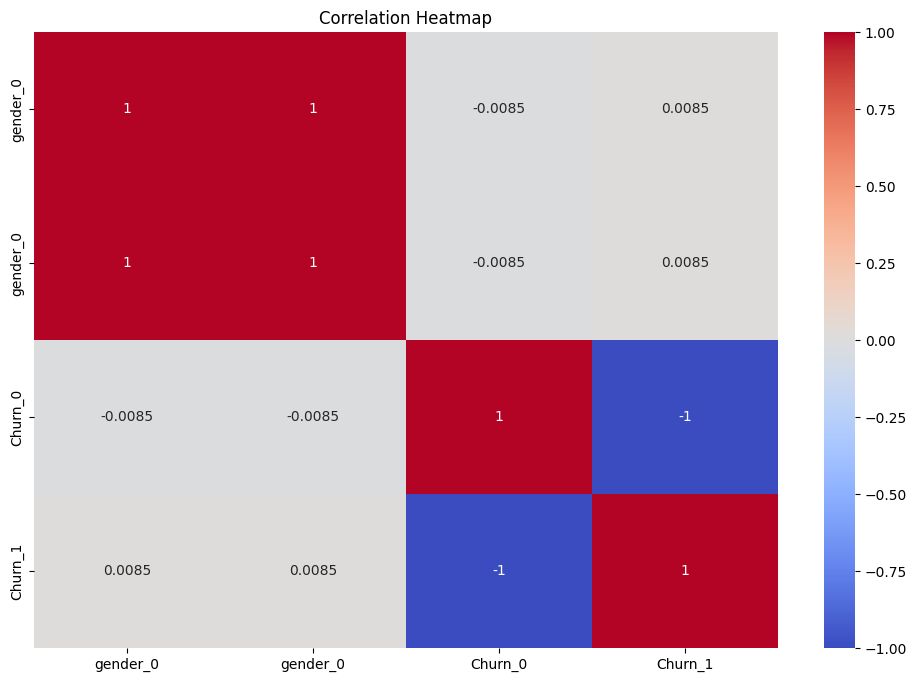

In [336]:
# calculate the correlation matrix
corr_matrix_gender = customer_infos[['gender_0','gender_0','Churn_0','Churn_1']].corr()
# plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_gender, vmin=-1, vmax=1, center=0, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [337]:
import numpy as np
from scipy.stats import chi2_contingency
# Define a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate the correlation between car and color using Cramér's V
cramer_v = cramers_v(customer_info['PaymentMethod'], customer_info['Churn'])
cramer_v1 = cramers_v(customer_info['Churn'], customer_info['PaymentMethod'])
print(f"Cramer's V: {cramer_v:.2f} and Reverse way : {cramer_v1:.2f}")

Cramer's V: 0.30 and Reverse way : 0.30


<Axes: xlabel='gender', ylabel='count'>

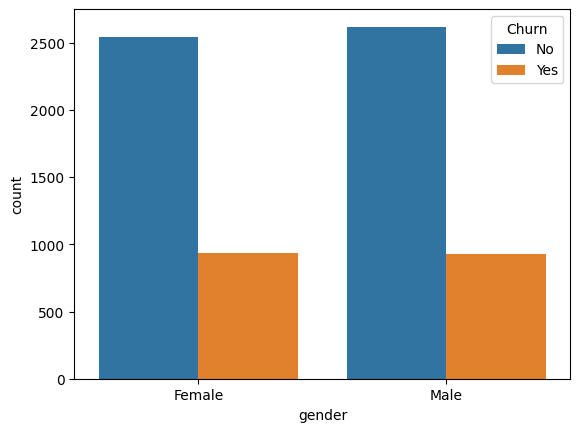

In [338]:
sns.countplot(x='gender', hue='Churn', data=customer_info[['Churn','gender']])

<Axes: xlabel='PaymentMethod', ylabel='count'>

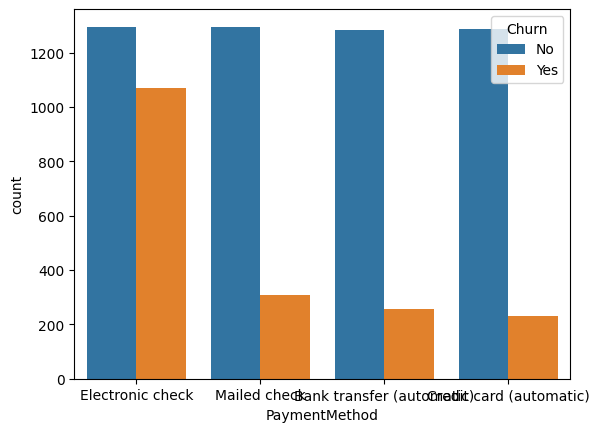

In [339]:
sns.countplot(x='PaymentMethod', hue='Churn', data=customer_info[['PaymentMethod','Churn']])



> **10. Conduct hypothesis tests (e.g., t-tests) to compare differences between churned and
non-churned customers.**



In [344]:
import pandas as pd
from scipy.stats import ttest_ind

# conduct the t-test for monthly charges

churned = customer_infos[customer_infos['Churn_0'] == 0]['MonthlyCharges']
not_churned = customer_infos[customer_infos['Churn_1'] == 1]['MonthlyCharges']
t_stat, p_val = ttest_ind(churned, not_churned, equal_var=False)

# print the results
print('Monthly Charges:')
print('Churned mean: {:.2f}'.format(churned.mean()))
print('Not churned mean: {:.2f}'.format(not_churned.mean()))
print('T-Statistic: {:.3f}, p-value: {:.3f}'.format(t_stat, p_val))


Monthly Charges:
Churned mean: 0.43
Not churned mean: 0.43
T-Statistic: 0.000, p-value: 1.000


we conduct an independent two-sample t-test between the two samples using ttest_ind(). We set the equal_var parameter to False to indicate that the variances of the two samples are not equal.

Finally, we print the results of the t-test, including the mean of monthly charges for the churned and non-churned customers, the t-statistic, and the p-value.

By analyzing the t-test results, we can determine if there is a significant difference between the means of monthly charges for churned and non-churned customers. If the p-value is less than or equal to the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant difference between the means of the two groups. Otherwise, we fail to reject the null hypothesis and conclude that there is no significant difference.
Here the p-value is greater than the significant difference



> **11. Create summary tables and statistics for various customer segments (e.g., by contract type,
payment method).**



In [345]:
customer_info.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [346]:
import pandas as pd

# calculate summary statistics by contract type
contract_type_stats = customer_info.groupby(['Contract'])[['tenure', 'MonthlyCharges', 'TotalCharges']].agg(['mean', 'std', 'min', 'max'])

# calculate summary statistics by payment method
payment_method_stats = df.groupby(['PaymentMethod'])[['tenure', 'MonthlyCharges', 'TotalCharges']].agg(['mean', 'std', 'min', 'max'])

# print the results
print('Contract Type Statistics:')
print(contract_type_stats)
print('\nPayment Method Statistics:')
print(payment_method_stats)


Contract Type Statistics:
                   tenure                    MonthlyCharges                    \
                     mean        std min max           mean        std    min   
Contract                                                                        
Month-to-month  18.036645  17.689054   1  72      66.398490  26.926599  18.75   
One year        42.073370  19.010750   1  72      65.079416  31.829391  18.25   
Two year        57.071810  17.729130   1  72      60.872374  34.712210  18.40   

                        
                   max  
Contract                
Month-to-month  117.45  
One year        118.60  
Two year        118.75  

Payment Method Statistics:
                              tenure                    MonthlyCharges  \
                                mean        std min max           mean   
PaymentMethod                                                            
Bank transfer (automatic)  43.656736  23.197901   0  72      67.192649   
Credit card (

<ipython-input-346-11e81feaa155>:4: FutureWarning: ['TotalCharges'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  contract_type_stats = customer_info.groupby(['Contract'])[['tenure', 'MonthlyCharges', 'TotalCharges']].agg(['mean', 'std', 'min', 'max'])
<ipython-input-346-11e81feaa155>:7: FutureWarning: ['TotalCharges'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  payment_method_stats = df.groupby(['PaymentMethod'])[['tenure', 'MonthlyCharges', 'TotalCharges']].agg(['mean', 'std', 'min', 'max'])


In [343]:
customer_infos['Churn_0']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_0, Length: 7032, dtype: int64